### 目标

接下来的内容中，我们将实现一个完成Logistic函数。包括：初始化、计算代价函数和梯度、使用梯度下降算法进行优化等并把他们整合成为一个函数。

### 过程

本实验用于通过训练来判断一副图像是否为猫。

在这个过程中，我们将会用到如下库：

numpy：Python科学计算中最重要的库

h5py：Python与H5文件交互的库

mathplotlib：Python画图的库

PIL：Python图像相关的库

scipy：Python科学计算相关的库

In [2]:
"""
first let's import the libaray
"""

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

#设置matplotlib在行内显示图片
%matplotlib inline

"""
before training, we need to load data first
"""

def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnocat.h5', "r") #读取H5文件
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) #train set labels
    
    test_dataset = h5py.File('datasets/test_catvnocat.h5', "r") #读取H5文件
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) #test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) #test set labels
    
    classes = np.array(test_dataset["list_classes"][:]) #list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0])) #对训练集和测试集标签进行reshape
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

"""
数据说明：

对于训练集的标签而言，对于猫，标记为1，否则标记为0。

每一个图像的维度都是(num_px, num_px, 3)，其中，长宽相同，3表示是RGB图像。

train_set_x_orig和test_set_x_orig中，包含_orig是由于我们稍候需要对图像进行预处理，预处理后的变量将会命名为train_set_x, train_set_y 我们不需要做处理。

train_set_x_orig中的每一个元素对于这一副图像，我们可以用如下代码将图像显示出来：

"""

# index = 25
# plt.imshow(train_set_x_orig[index])
# print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' picture.")

"""
接下来，我们需要根据图像集来计算出训练集的大小、测试集的大小以及图片的大小：
"""

m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
# print (m_train, m_test, num_px)

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

"""
接下来，我们需要对将每幅图像转为一个矢量，即矩阵的一列。

最终，整个训练集将会转为一个矩阵，其中包括num_px*numpy*3行，m_train列。
"""

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
# 其中X_flatten = X.reshape(X.shape[0], -1).T可以将一个维度为(a,b,c,d)的矩阵转换为一个维度为(b∗∗c∗∗d, a)的矩阵。

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

"""
接下来，我们需要对图像值进行归一化 机器学习中的一个常用步骤。

由于图像的原始值在0到255之间，最简单的方式是直接除以255即可。
"""

train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255




Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


### What you need to remember:

Common steps for pre-processing a new dataset are:

- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px * num_px * 3, 1)
- "Standardize" the data



### 接下来，我们来看一下Logistic的结构：

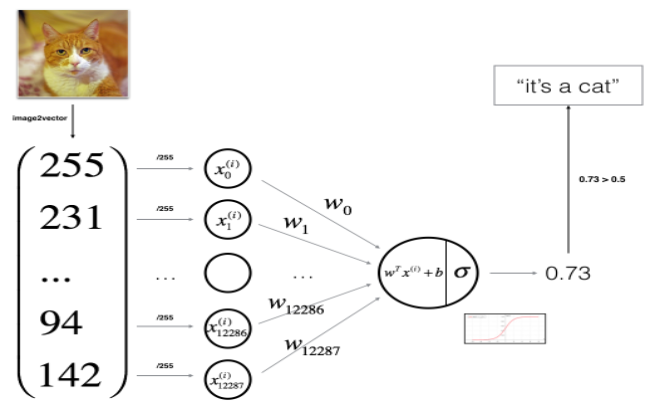

对于每个训练样本x，其误差函数的计算方式如下：

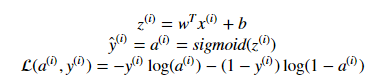

而整体的代价函数计算如下：

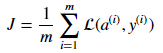

**Key steps: In this exercise, you will carry out the following steps:**

- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost  
- Use the learned parameters to make predictions (on the test set)
- Analyse the results and conclude

### 接下来，我们将按照如下步骤来实现Logistic：

1. 定义模型结构

2. 初始化模型参数

3. 循环

    3.1 前向传播

    3.2 反向传递

    3.3 更新参数

4. 整合成为一个完整的模型

In [3]:
# Step1：实现sigmod函数


def sigmoid(z):
    """
    Compute the sigmoid of z
    
    Arguments:
    z -- A scalar or numpy array of any size.
 
    Return:
    s -- sigmoid(z)
    """
    
    s = 1.0 / (1 + np.exp(-z))
    return s


# Step2：初始化参数


def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim, 1))
    b = 0
    return w, b


# Step3：前向传播与反向传播


计算公式如下：（具体计算公式来源请查看之前的理论课）

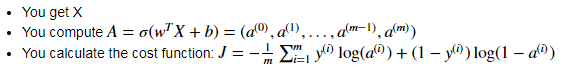

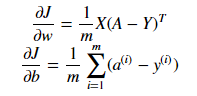

In [4]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above
 
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
 
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)                                    
    # compute activation
    cost = -1.0 / m * np.sum(Y * np.log(A) + (1.0 - Y) * np.log(1.0 - A))                                 
    # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = 1.0 / m * np.dot(X, (A - Y).T)
    db = 1.0 / m * np.sum(A - Y)
    cost = np.squeeze(cost)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


# Step4：更新参数


更新参数的公式如下：



In [5]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations): #每次迭代循环一次， num_iterations为迭代次数
        
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule 
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs


# Step5：利用训练好的模型对测试集进行预测：


计算公式如下：

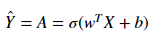

当输入大于0.5时，我们认为其预测认为结果是猫，否则不是猫。

In [6]:
def predict(w, b, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    """
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0][i] > 0.5:
            Y_prediction[0][i] = 1
        else:
            Y_prediction[0][i] = 0
            
    return Y_prediction




**What to remember: You've implemented several functions that:**

- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
  - computing the cost and its gradient
  - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples



In [7]:
# Step6：将以上功能整合到一个模型中：


def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])
    
     # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d


# Test Model


d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 3000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Cost after iteration 2000: 0.135608
Cost after iteration 2100: 0.130708
Cost after iteration 2200: 0.126137
Cost after iteration 2300: 0.121861
Cost after iteration 2400: 0.117855
Cost after iteration 2500: 0.114093
Cost after iteration 2600: 0.110554
Cost after iteration 2700: 0.107219
Cost

此时，观察打印结果，我们可以发现我们的测试准确率已经可以达到70.0%。

而对于训练集，其准确性达到了99%。这表明了我们的模型有着一定的过拟合，不过不要着急，我们会在后续的内容中来解决这一问题。

you predicted that it is a "cat" picture.


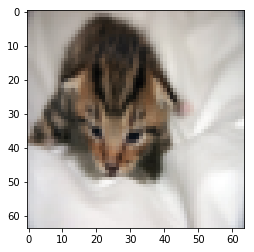

In [8]:
# Example of a picture that was wrongly classified.

index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")


此外，我们还可以画出我们的代价函数变化曲线：

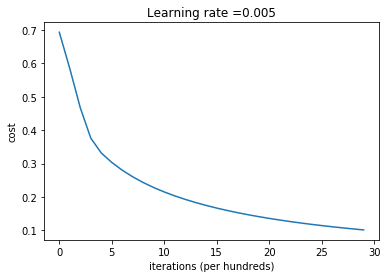

In [9]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()


Interpretation: You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called **overfitting**.


之前的理论课程中，我们已经提及过学习速率对于最终的结果有着较大影响，现在，我们来用实验让大家有一个直观的了解。

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



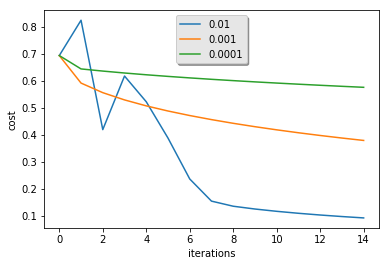

In [10]:
learning_rates = [0.01, 0.001, 0.0001]

models = {}

for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')
 
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
 
plt.ylabel('cost')
plt.xlabel('iterations')
 
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

分析：不同的学习速率会导致不同的预测结果。较小的学习速度收敛速度较慢并出现过拟合（训练数据精度远大于测试精度），而过大的学习速度（0.01）可能导致震荡或无法收敛（虽然在本例中最后收敛了）。

如果出现了过拟合我们需要尝试其他方法减少过拟合。

如果你希望用一副你自己的图像，而不是训练集或测试集中的图像，那么该如何实现呢？

y = 0.0, your algorithm predicts a "non-cat" picture.


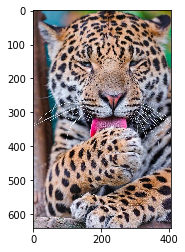

In [11]:

my_image = "test_cat.jpg"   # change this to the name of your image file 
 
# We preprocess the image to fit your algorithm.
fname = "test_image/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))  #读取图片
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T  #放缩图像
my_predicted_image = predict(d["w"], d["b"], my_image)  #预测
 
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")




**What to remember from this assignment:**

- Preprocessing the dataset is important.
- You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
- Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!

